   > ## Importation des librairies:

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

> ## Importation des algorithmes:

In [43]:
from sklearn import datasets, linear_model #sklearn est une mine d'or pour faire du machine learning dans Python.
from sklearn.metrics import mean_squared_error

> ## Importation du jeu de donnees et description:

In [44]:
from sklearn.datasets import load_diabetes
#On doit definir quel jeu de donnees precisement.

In [45]:
diabetes=load_diabetes()
# On installe le jeu de donnees

In [46]:
diabetes.keys()# les attributs du jeu de donnees

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

In [47]:
print (diabetes.DESCR) # Description du jeu de donnees.

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [48]:
#A quoi cela ressemble?
#Notez que Python commence a 0, pas 1. Donc quand vous voulez sortir les 3 premieres rangees, commencez a 0.
print (diabetes.feature_names)
print (diabetes.data[0:3])
print (diabetes.target[0:3])


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]]
[151.  75. 141.]


> ## Definition de la variable a predire:

In [49]:
df_diabetes = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)#Transposons nos 10 features dans une dataframe: colonnes et rangees
df_diabetes['target'] = pd.Series(diabetes.target)# Transposons notre variable a predire dans une serie
y = diabetes.target #Definissons y comme etant notre variable a predire. y ici est une donnee quantitative mesurant le degre de progression de la maladie.
df_diabetes.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


> ## Exploration des donnees ou EDA: Exploratory Data Analysis:

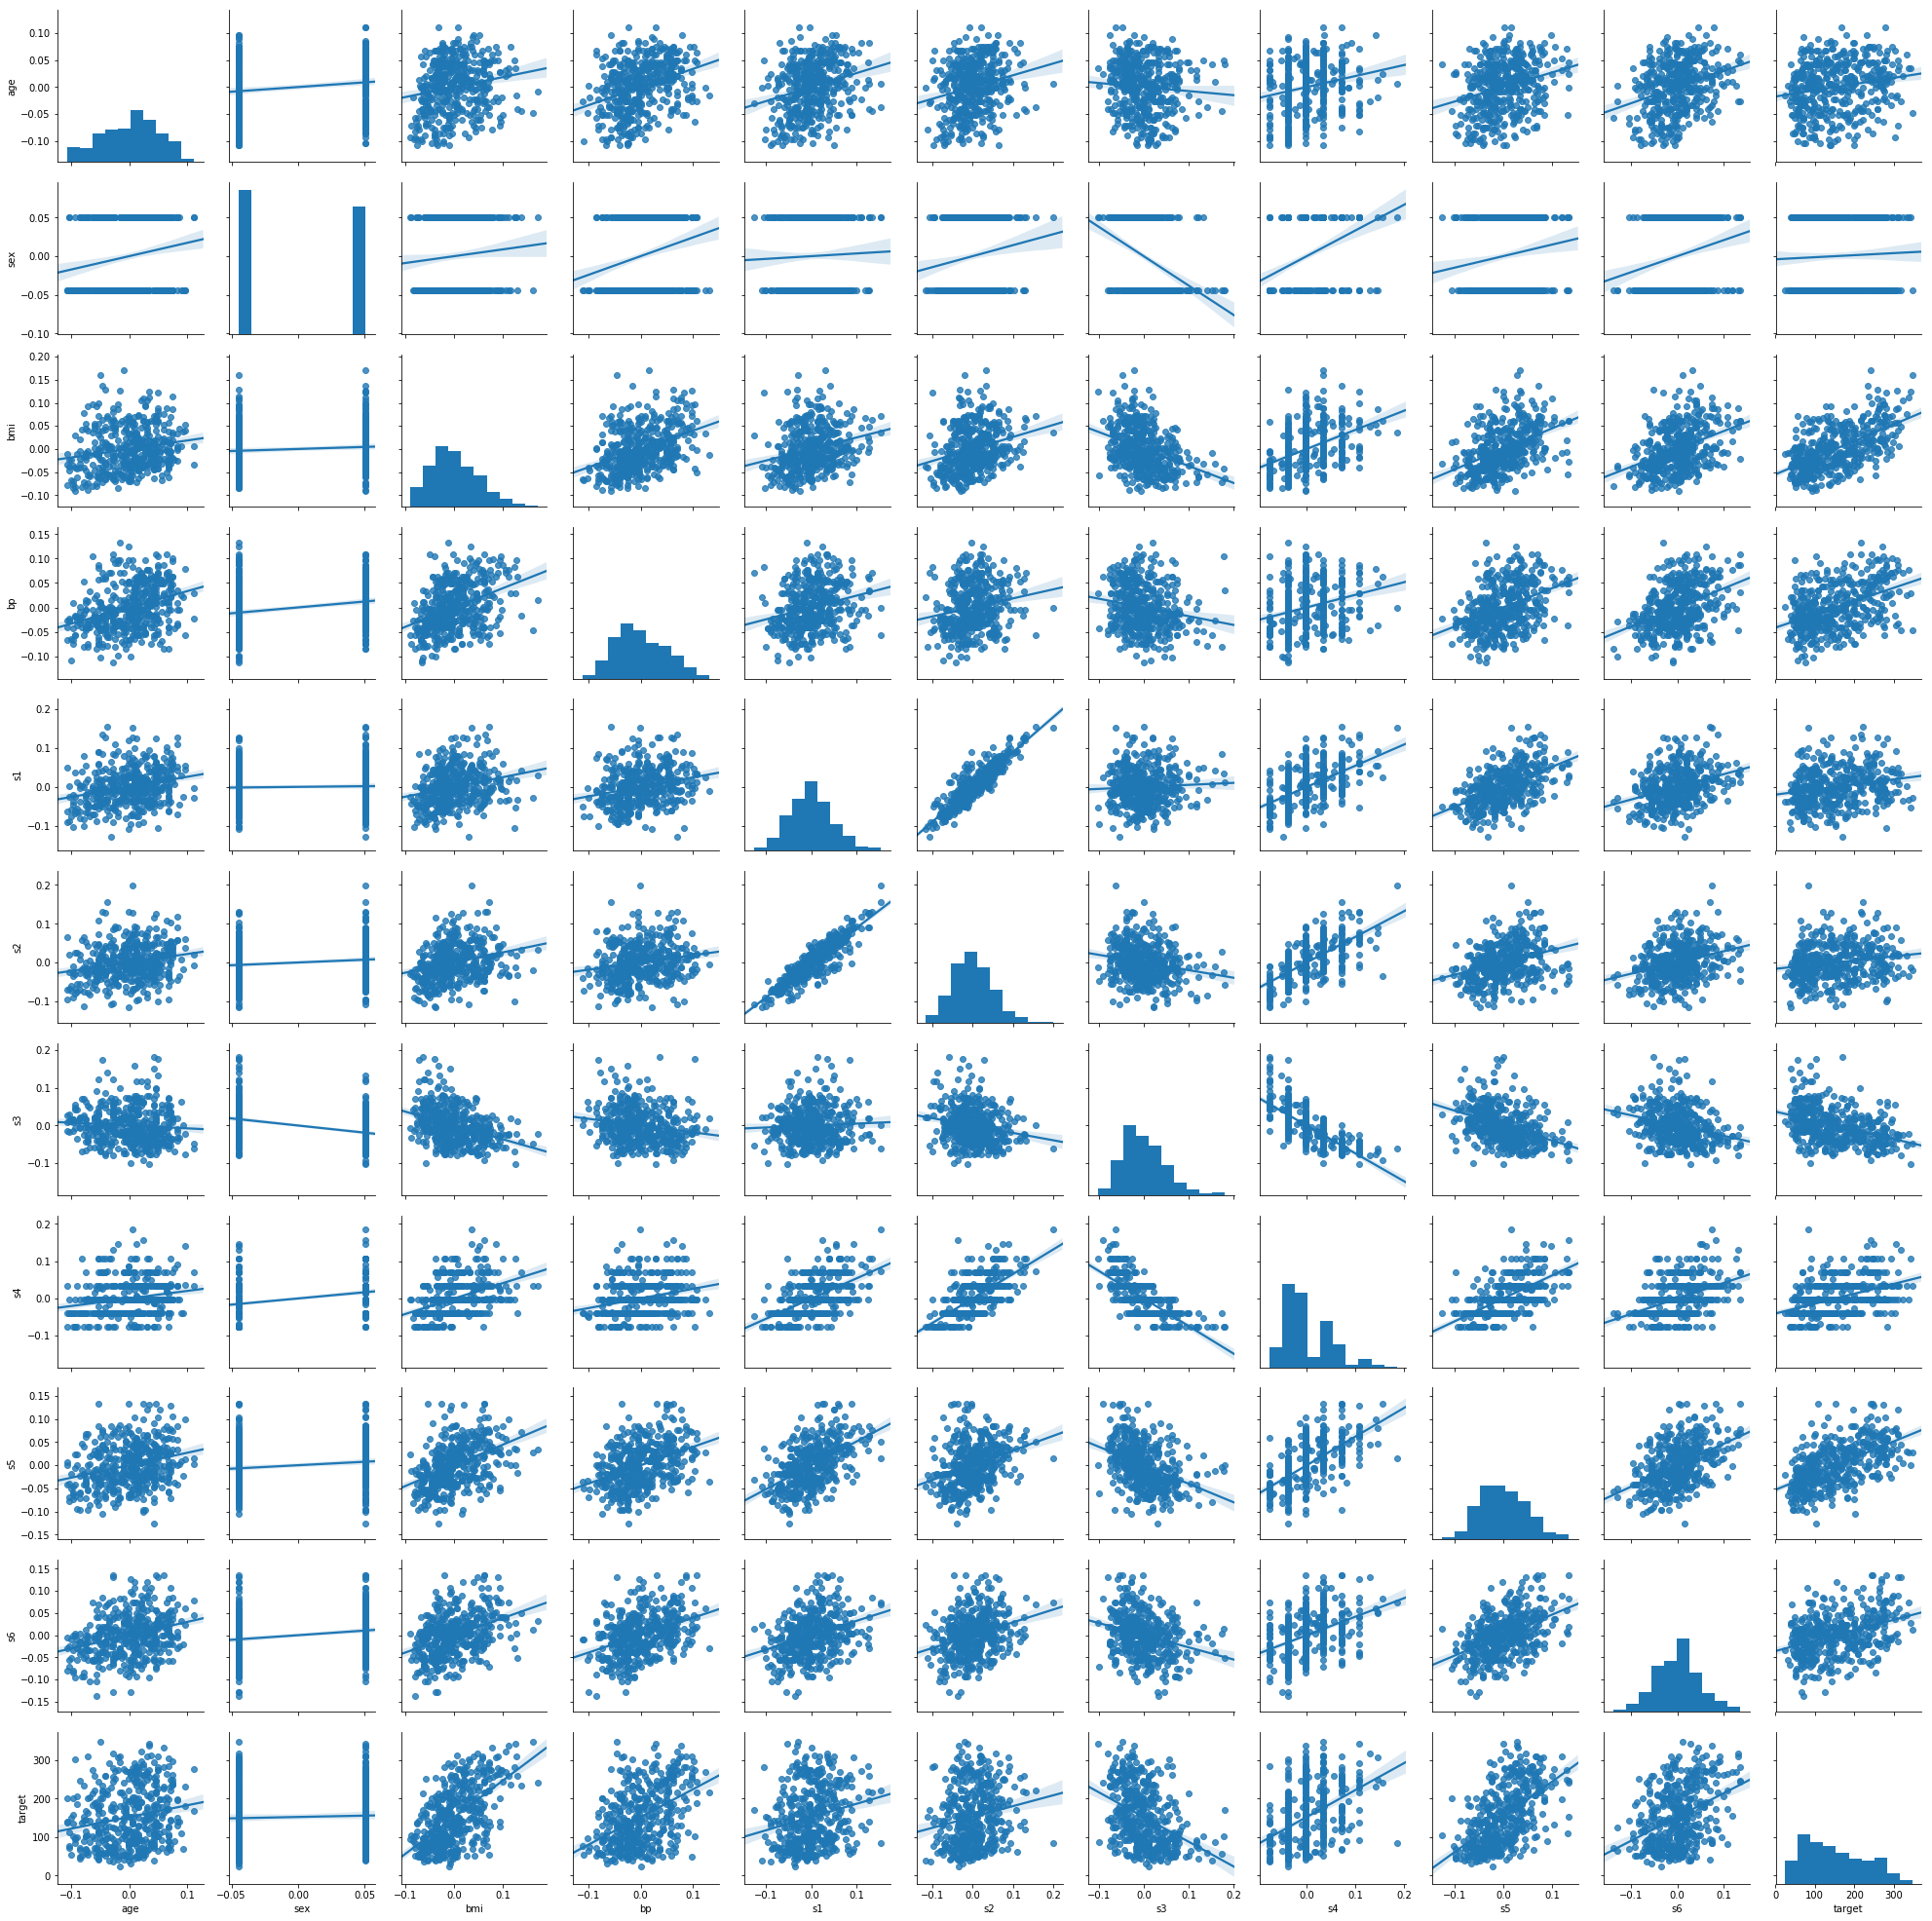

In [50]:
sns.pairplot(df_diabetes, kind="reg") #Observons la linearite ou pas de toutes nos variables les unes comparees aux autres.

In [51]:
#Definition de x et y
X=diabetes.data
y=diabetes.target

In [52]:
df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


> ## Demarrage de la phase de test: 

In [53]:
from sklearn.model_selection import train_test_split 

**C'est la ou la partie learning de Machine Learning rentre en scene!**

Remarquez aussi **split**, cela signifie que l'on va diviser notre jeu de donnee en deux: une partie pour la premiere phase qui correspond a la phase d'**l'entrainement** de la machine et l'autre partie pour **tester** si ce que la machine aura appris est fiable.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [55]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)



(353, 10)
(89, 10)
(353,)
(89,)


## Installation du modele de regression lineaire sur le jeu de donnees: ##

In [56]:
# On cree une instance de notre modele
lm1 = linear_model.LinearRegression()

X = diabetes.data
y = diabetes.target 
#On fit/installe notre modele sur notre jeu de donnees.
lm1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
print (lm1.coef_)#Interpreter la signification des coefficients
# + 1 an, se traduit par une augmentation de 37 de l'indice diabetique/la progression de la maladie apres 1 an.
# une augmentation d'un point d'indice de masse corporelle se traduit par une augmentation de 542 de l'indice diabetique.

[  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]


In [58]:
print (lm1.intercept_) # sans aucune influence des facteurs sexe, age etc...l'indice diabetique est de 151.

151.3456553477407


In [59]:
pred1 = lm1.predict(X_test)
#Ici, on sort les 10 premieres valeurs predites par notre learning post apprentissage...
print(lm1.predict(X_test[0:10]))

[139.5483133  179.52030578 134.04133298 291.41193598 123.78723656
  92.17357677 258.23409704 181.33895238  90.22217862 108.63143298]


> ### Evaluation du modele:

> #### 1) Calcul de l'erreur du modele:

In [60]:
print (np.sqrt(mean_squared_error(y_test, pred1)))

53.8532569849144


> #### 2) Calcul du score du modele:

In [61]:
score1=lm1.score(X_test,y_test)
print (score1)


0.452606602161738


> #### 3) Calcul de l'erreur du modele de base:

In [62]:
#baseline prediction
#Ici, le modele de base/notre benchmark est le modele qui va predire que toute nouvelle observation la moyenne 
baseline=np.mean(y_test)
baseline



145.77528089887642

In [63]:
baseline_pred=np.empty(len(y_test))# cree un nouveau tableau
baseline_pred.fill(baseline) #rempli avec predictions
print(np.sqrt(mean_squared_error(y_test,baseline_pred)))

72.78840394263774


In [64]:
print(y_test, baseline_pred)
#Ici, on sort les valeurs predies versus la moyenne

[219.  70. 202. 230. 111.  84. 242. 272.  94.  96.  94. 252.  99. 297.
 135.  67. 295. 264. 170. 275. 310.  64. 128. 232. 129. 118. 263.  77.
  48. 107. 140. 113.  90. 164. 180. 233.  42.  84. 172.  63.  48. 108.
 156. 168.  90.  52. 200.  87.  90. 258. 136. 158.  69.  72. 171.  95.
  72. 151. 168.  60. 122.  52. 187. 102. 214. 248. 181. 110. 140. 202.
 101. 222. 281.  61.  89.  91. 186. 220. 237. 233.  68. 190.  96.  72.
 153.  98.  37.  63. 184.] [145.7752809 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809
 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809
 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809
 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809
 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809
 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809
 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809 145.7752809
 145.7752809 145.7752809 145.7752809

### > Interpretation ###